In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import scipy.signal as sig

In [2]:
output_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_double_support_code\test_hip_heel_dist\BW-0204'
csv_file_name = 'test_hip_heel_events.csv'
png_file_name = 'test_hip_heel_events.png'

In [3]:
mp_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_outputs_005\subset_for_memory_c\BW-0204\2023_07_31\000_raw_pose_data\gait_vertical_PWS_1_mediapipe.csv'

In [4]:
mp_df = pd.read_csv(mp_path, index_col = 0)
mp_df['Y_neg'] = -mp_df['Y']
mp_df.head()

,X,Y,Z,vis,pres,frame,label,Y_neg
0,inf,inf,inf,inf,inf,0,NaN,-inf
0,inf,inf,inf,inf,inf,1,NaN,-inf
0,inf,inf,inf,inf,inf,2,NaN,-inf
0,inf,inf,inf,inf,inf,3,NaN,-inf
0,inf,inf,inf,inf,inf,4,NaN,-inf


### ankle y position 

In [5]:
# smooth Y ankle data  
mp_r_ank_df = mp_df.loc[mp_df['label'] == 'right_ankle']
mp_r_ank_df = mp_r_ank_df.copy()
mp_r_ank_df['Y_smooth'] = mp_r_ank_df['Y'].rolling(window=5, min_periods=1).mean()
mp_r_ank_df['Y_neg_smooth'] = mp_r_ank_df['Y_neg'].rolling(window=5, min_periods=1).mean()


mp_l_ank_df = mp_df.loc[mp_df['label'] == 'left_ankle']
mp_l_ank_df = mp_l_ank_df.copy()
mp_l_ank_df['Y_smooth'] = mp_l_ank_df['Y'].rolling(window=5, min_periods=1).mean()
mp_l_ank_df['Y_neg_smooth'] = mp_l_ank_df['Y_neg'].rolling(window=5, min_periods=1).mean()

In [6]:
mp_r_ank_df.head()

,X,Y,Z,vis,pres,frame,label,Y_neg,Y_smooth,Y_neg_smooth
28,0.029091,1.002544,0.252496,0.134607,0.0,15,right_ankle,-1.002544,1.002544,-1.002544
28,0.166804,0.677006,0.320360,0.132799,0.0,16,right_ankle,-0.677006,0.839775,-0.839775
28,0.353545,0.969324,0.423302,0.212263,0.0,32,right_ankle,-0.969324,0.882958,-0.882958
28,0.326904,0.942097,0.337555,0.280344,0.0,33,right_ankle,-0.942097,0.897743,-0.897743
28,0.419933,0.965210,-0.135066,0.346839,0.0,34,right_ankle,-0.965210,0.911236,-0.911236


In [7]:
mp_l_ank_df.head()

,X,Y,Z,vis,pres,frame,label,Y_neg,Y_smooth,Y_neg_smooth
27,0.043917,0.611754,0.603629,0.115750,0.0,15,left_ankle,-0.611754,0.611754,-0.611754
27,0.178079,0.661124,0.259181,0.113800,0.0,16,left_ankle,-0.661124,0.636439,-0.636439
27,0.201853,0.751163,0.468570,0.172345,0.0,32,left_ankle,-0.751163,0.674680,-0.674680
27,0.263225,0.739903,0.950064,0.181656,0.0,33,left_ankle,-0.739903,0.690986,-0.690986
27,0.276242,0.716700,1.063997,0.195587,0.0,34,left_ankle,-0.716700,0.696129,-0.696129


In [8]:
# find peaks - peaks of raw Y data - valley of true ankle position 
# raw data is kind of flipped 
r_y_valley_i, _ = sig.find_peaks(-mp_r_ank_df['Y_neg_smooth'], distance = 5)
l_y_valley_i, _ = sig.find_peaks(-mp_l_ank_df['Y_neg_smooth'], distance = 5)

In [9]:
# make peak dfs 
r_y_valley_df = pd.DataFrame(data = {'frame' : mp_r_ank_df.iloc[r_y_valley_i]['frame'],
                                    'peak_y_smooth_val' : mp_r_ank_df.iloc[r_y_valley_i]['Y_neg_smooth']
                                    })

l_y_valley_df = pd.DataFrame(data = {'frame' : mp_l_ank_df.iloc[l_y_valley_i]['frame'],
                                    'peak_y_smooth_val' : mp_l_ank_df.iloc[l_y_valley_i]['Y_neg_smooth']
                                    })

(-1.0, 0.0)

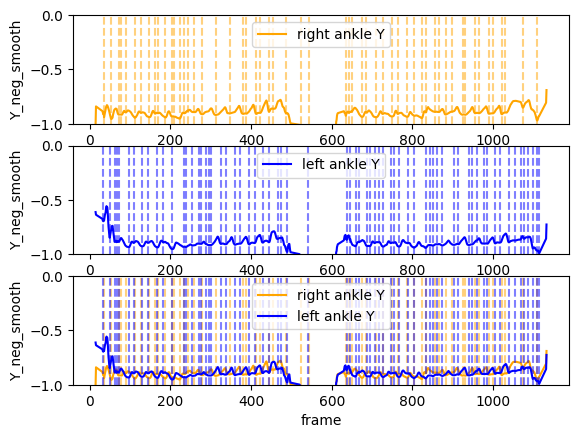

In [10]:
fig, axs = plt.subplots(3)

sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_r_ank_df, color = 'orange', label = 'right ankle Y', ax = axs[0]) 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_r_ank_df, color = 'orange', label = 'right ankle Y', ax = axs[2])
for r_valley_frame in r_y_valley_df['frame']:
    axs[0].axvline(r_valley_frame, color = 'orange', linestyle = '--', alpha = 0.5)
    axs[2].axvline(r_valley_frame, color = 'orange', linestyle = '--', alpha = 0.5)

sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_l_ank_df, color = 'blue', label = 'left ankle Y', ax = axs[1]) 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_l_ank_df, color = 'blue', label = 'left ankle Y', ax = axs[2]) 
for l_valley_frame in l_y_valley_df['frame']: 
    axs[1].axvline(l_valley_frame, color = 'blue', linestyle = '--', alpha = 0.5) 
    axs[2].axvline(l_valley_frame, color = 'blue', linestyle = '--', alpha = 0.5)


#axs[0].set_xlim([100, 400])
#axs[1].set_xlim([200, 400])
#axs[2].set_xlim([200, 400])

axs[0].set_ylim([-1, 0])
axs[1].set_ylim([-1, 0])
axs[2].set_ylim([-1, 0])

### hip distance 

In [11]:
# ankle hip to heel difference 
mp_r_hip_df = mp_df.loc[mp_df['label'] == 'right_hip']
mp_r_hip_df = mp_r_hip_df.copy()
mp_r_hip_df['Y_smooth'] = mp_r_hip_df['Y'].rolling(window=10, min_periods=1).mean()
mp_r_hip_df.set_index('frame', inplace=True)

mp_l_hip_df = mp_df.loc[mp_df['label'] == 'left_hip']
mp_l_hip_df = mp_l_hip_df.copy()
mp_l_hip_df['Y_smooth'] = mp_l_hip_df['Y'].rolling(window=10, min_periods=1).mean()
mp_l_hip_df.set_index('frame', inplace=True)

mp_r_ank_df.set_index('frame', inplace=True)
mp_l_ank_df.set_index('frame', inplace=True) 



In [12]:
mp_l_ank_df

,X,Y,Z,vis,pres,label,Y_neg,Y_smooth,Y_neg_smooth
frame,,,,,,,,,
15,0.043917,0.611754,0.603629,0.115750,0.0,left_ankle,-0.611754,0.611754,-0.611754
16,0.178079,0.661124,0.259181,0.113800,0.0,left_ankle,-0.661124,0.636439,-0.636439
32,0.201853,0.751163,0.468570,0.172345,0.0,left_ankle,-0.751163,0.674680,-0.674680
33,0.263225,0.739903,0.950064,0.181656,0.0,left_ankle,-0.739903,0.690986,-0.690986
34,0.276242,0.716700,1.063997,0.195587,0.0,left_ankle,-0.716700,0.696129,-0.696129
...,...,...,...,...,...,...,...,...,...
1112,0.511375,1.020311,0.882486,0.852249,0.0,left_ankle,-1.020311,0.975993,-0.975993
1113,0.500751,1.005051,1.305578,0.836087,0.0,left_ankle,-1.005051,0.983642,-0.983642
1114,0.477487,0.997933,1.514622,0.801735,0.0,left_ankle,-0.997933,0.990459,-0.990459


In [41]:
r_hip_ank_diff = abs(mp_r_hip_df['Y'] - mp_r_ank_df['Y'])
l_hip_ank_diff = abs(mp_l_hip_df['Y'] - mp_l_ank_df['Y'])

diff_df = pd.DataFrame({'r_diff' : r_hip_ank_diff, 
                        'l_diff' : l_hip_ank_diff}) 
diff_df = diff_df.reset_index()
diff_df.head()

,frame,r_diff,l_diff
0,15,0.321645,0.089501
1,16,0.060282,0.082330
2,32,0.374606,0.301749
3,33,0.350871,0.288767
4,34,0.383267,0.270713


In [42]:
# ankle hip to heel difference peaks 
r_diff_peaks_i, _ = sig.find_peaks(diff_df['r_diff'], distance = 5)
l_diff_peaks_i, _ = sig.find_peaks(diff_df['l_diff'], distance = 5)

# make into data frame - selecting frame 
r_diff_peaks_df = pd.DataFrame(data = {'frame' : diff_df.iloc[r_diff_peaks_i]['frame'],
                                       'peak_diff_val' : diff_df.iloc[r_diff_peaks_i]['r_diff']
                                       })

l_diff_peaks_df = pd.DataFrame(data = {'frame' : diff_df.iloc[l_diff_peaks_i]['frame'],
                                       'peak_diff_val' : diff_df.iloc[l_diff_peaks_i]['l_diff']
                                       })

(0.0, 0.7)

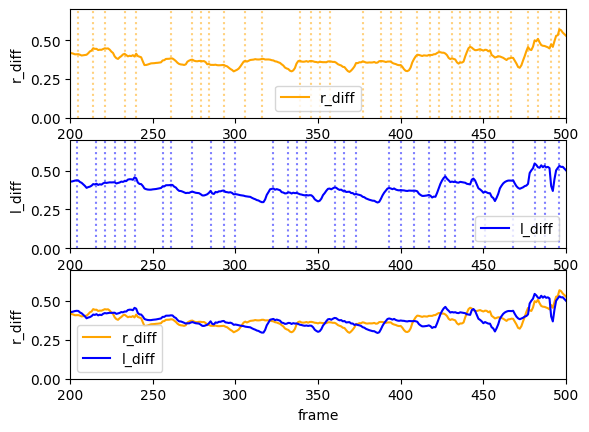

In [43]:
# plot hip to ank diffs and peaks 
fig, axs = plt.subplots(3)
sns.lineplot(x = 'frame', y = 'r_diff', data = diff_df, color = 'orange', label = 'r_diff', ax = axs[0])
sns.lineplot(x = 'frame', y = 'r_diff', data = diff_df, color = 'orange', label = 'r_diff', ax = axs[2])
for r_diff_peak_frame in r_diff_peaks_df['frame']: 
    axs[0].axvline(r_diff_peak_frame, color = 'orange', linestyle = ':', alpha = 0.5) 
    
sns.lineplot(x = 'frame', y = 'l_diff', data = diff_df, color = 'blue', label = 'l_diff', ax = axs[1])
sns.lineplot(x = 'frame', y = 'l_diff', data = diff_df, color = 'blue', label = 'l_diff', ax = axs[2])
for l_diff_peak_frame in l_diff_peaks_df['frame']: 
    axs[1].axvline(l_diff_peak_frame, color = 'blue', linestyle = ':', alpha = 0.5) 
    
plt.legend()
axs[0].set_xlim([200, 500])
axs[1].set_xlim([200, 500])
axs[2].set_xlim([200, 500])
axs[0].set_ylim([0, 0.7])
axs[1].set_ylim([0, 0.7])
axs[2].set_ylim([0, 0.7])

In [16]:
mp_r_ank_df.head()

,X,Y,Z,vis,pres,label,Y_neg,Y_smooth,Y_neg_smooth
frame,,,,,,,,,
15,0.029091,1.002544,0.252496,0.134607,0.0,right_ankle,-1.002544,1.002544,-1.002544
16,0.166804,0.677006,0.320360,0.132799,0.0,right_ankle,-0.677006,0.839775,-0.839775
32,0.353545,0.969324,0.423302,0.212263,0.0,right_ankle,-0.969324,0.882958,-0.882958
33,0.326904,0.942097,0.337555,0.280344,0.0,right_ankle,-0.942097,0.897743,-0.897743
34,0.419933,0.965210,-0.135066,0.346839,0.0,right_ankle,-0.965210,0.911236,-0.911236


### Crossing frrames 

In [17]:
#at  what frames right and left mp ankle values cross? 
ankle_y_df = pd.DataFrame(data = {'r_ankle_neg_smooth_y' : mp_r_ank_df['Y_neg_smooth'], 
                                  'l_ankle_neg_smooth_y' : mp_l_ank_df['Y_neg_smooth']})

# mean of 
ankle_y_df['r_l_neg_y_mean'] =  ankle_y_df[['r_ankle_neg_smooth_y', 
                                            'l_ankle_neg_smooth_y']].mean(axis=1)

# Create a new column to identify whether col1 is greater than col2
ankle_y_df['r_greater'] = ankle_y_df['r_ankle_neg_smooth_y'] > ankle_y_df['l_ankle_neg_smooth_y']

# Find the places where the value of r_greater changes
ankle_y_df['change'] = ankle_y_df['r_greater'].ne(ankle_y_df['r_greater'].shift())

# save df with only y crossing frames 
ank_y_cross = ankle_y_df.loc[ankle_y_df['change'] == True]

# reset index so frame is a colun 
ank_y_cross = ank_y_cross.reset_index()
ankle_y_df = ankle_y_df.reset_index() 

# only select ank cross with 
fps = 30
ank_y_cross['sec_diff'] = (ank_y_cross['frame'].diff())/30
# sec_diff = change in y position in next row 
ank_y_cross['sec_diff'] = ank_y_cross['sec_diff'].shift(-1) 
# y cross + tenth of a second 
# why - heel starts to lift and cross slightly before true toe off (I think) 

ank_y_cross['frame_tenth'] = ank_y_cross['frame'] + round(fps * .10)

In [18]:
ankle_y_df.head()

,frame,r_ankle_neg_smooth_y,l_ankle_neg_smooth_y,r_l_neg_y_mean,r_greater,change
0,15,-1.002544,-0.611754,-0.807149,False,True
1,16,-0.839775,-0.636439,-0.738107,False,False
2,32,-0.882958,-0.674680,-0.778819,False,False
3,33,-0.897743,-0.690986,-0.794365,False,False
4,34,-0.911236,-0.696129,-0.803683,False,False


(array([ 4., 20., 21.,  3.,  1.,  2.,  1.,  0.,  0.,  1.]),
 array([0.03333333, 0.31333333, 0.59333333, 0.87333333, 1.15333333,
        1.43333333, 1.71333333, 1.99333333, 2.27333333, 2.55333333,
        2.83333333]),
 <BarContainer object of 10 artists>)

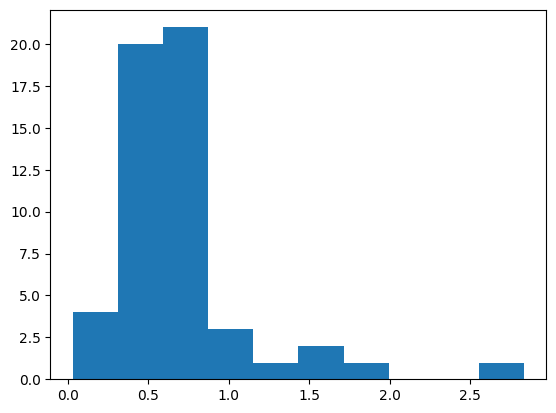

In [19]:
plt.hist(ank_y_cross['sec_diff'])

In [20]:
r_ank_y_cross = ank_y_cross.loc[ank_y_cross['r_greater'] == True]
l_ank_y_cross = ank_y_cross.loc[ank_y_cross['r_greater'] == False]

(-1.0, 0.0)

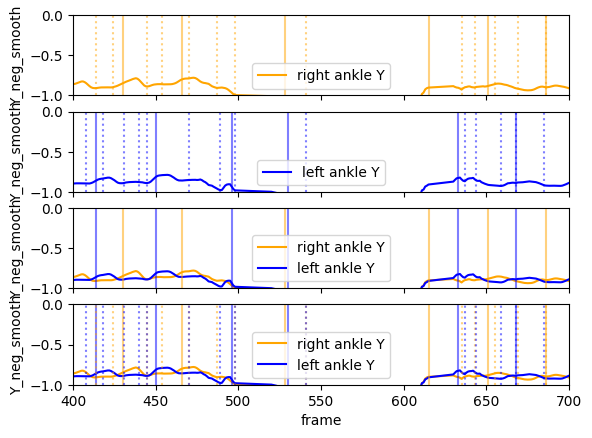

In [21]:
fig, axs = plt.subplots(4, sharex=True, sharey=True)
# right ankle y position 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_r_ank_df, color = 'orange', label = 'right ankle Y', ax = axs[0]) 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_r_ank_df, color = 'orange', label = 'right ankle Y', ax = axs[2])
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_r_ank_df, color = 'orange', label = 'right ankle Y', ax = axs[3])
# left ankle y position 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_l_ank_df, color = 'blue', label = 'left ankle Y', ax = axs[1]) 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_l_ank_df, color = 'blue', label = 'left ankle Y', ax = axs[2]) 
sns.lineplot(x = 'frame', y = 'Y_neg_smooth', data = mp_l_ank_df, color = 'blue', label = 'left ankle Y', ax = axs[3]) 
#  crossing of mp ankle y markers - right increasing - toe off?
for r_ank_y_cross_frame in r_ank_y_cross['frame_tenth']:
    axs[0].axvline(r_ank_y_cross_frame, color = 'orange', linestyle = '-', alpha = 0.5)
    axs[2].axvline(r_ank_y_cross_frame, color = 'orange', linestyle = '-', alpha = 0.5)
    axs[3].axvline(r_ank_y_cross_frame, color = 'orange', linestyle = '-', alpha = 0.5)
    
#  crossing of mp ankle y markers - left increasing - toe off?
for l_ank_y_cross_frame in l_ank_y_cross['frame_tenth']:
    axs[1].axvline(l_ank_y_cross_frame, color = 'blue', linestyle = '-', alpha = 0.5)
    axs[2].axvline(l_ank_y_cross_frame, color = 'blue', linestyle = '-', alpha = 0.5)
    axs[3].axvline(l_ank_y_cross_frame, color = 'blue', linestyle = '-', alpha = 0.5)
    
# peak distance of hip to heel right - heel strike?   
for r_diff_peak_frame in r_diff_peaks_df['frame']: 
    axs[0].axvline(r_diff_peak_frame, color = 'orange', linestyle = ':', alpha = 0.5) 
    axs[3].axvline(r_diff_peak_frame, color = 'orange', linestyle = ':', alpha = 0.5)
    
# peak distance of hip to heel left - heel strike?   
for l_diff_peak_frame in l_diff_peaks_df['frame']: 
    axs[1].axvline(l_diff_peak_frame, color = 'blue', linestyle = ':', alpha = 0.5) 
    axs[3].axvline(l_diff_peak_frame, color = 'blue', linestyle = ':', alpha = 0.5) 
    
axs[0].set_xlim([400, 700])
axs[1].set_xlim([400, 700])
axs[2].set_xlim([400, 700])
axs[3].set_xlim([400, 700])

axs[0].set_ylim([-1, 0])
axs[1].set_ylim([-1, 0])
axs[2].set_ylim([-1, 0])
axs[3].set_ylim([-1, 0])

## Try algorithm to extract 

In [22]:
ank_y_cross.head()

,frame,r_ankle_neg_smooth_y,l_ankle_neg_smooth_y,r_l_neg_y_mean,r_greater,change,sec_diff,frame_tenth
0,15,-1.002544,-0.611754,-0.807149,False,True,1.566667,18
1,62,-0.867620,-0.884750,-0.876185,True,True,0.233333,65
2,69,-0.891808,-0.880238,-0.886023,False,True,0.533333,72
3,85,-0.882998,-0.890631,-0.886814,True,True,0.600000,88
4,103,-0.897201,-0.893652,-0.895427,False,True,0.633333,106


In [23]:
r_ank_y_cross.head()

,frame,r_ankle_neg_smooth_y,l_ankle_neg_smooth_y,r_l_neg_y_mean,r_greater,change,sec_diff,frame_tenth
1,62,-0.867620,-0.884750,-0.876185,True,True,0.233333,65
3,85,-0.882998,-0.890631,-0.886814,True,True,0.600000,88
5,122,-0.887602,-0.896439,-0.892020,True,True,0.500000,125
7,157,-0.881546,-0.890070,-0.885808,True,True,0.600000,160
9,194,-0.896027,-0.898403,-0.897215,True,True,0.533333,197


In [24]:
l_ank_y_cross.head()

,frame,r_ankle_neg_smooth_y,l_ankle_neg_smooth_y,r_l_neg_y_mean,r_greater,change,sec_diff,frame_tenth
0,15,-1.002544,-0.611754,-0.807149,False,True,1.566667,18
2,69,-0.891808,-0.880238,-0.886023,False,True,0.533333,72
4,103,-0.897201,-0.893652,-0.895427,False,True,0.633333,106
6,137,-0.901763,-0.899023,-0.900393,False,True,0.666667,140
8,175,-0.901264,-0.889249,-0.895256,False,True,0.633333,178


In [25]:
r_diff_peaks_df.head()

,frame,peak_diff_val
6,36,0.345992
23,53,0.384784
47,77,0.505985
59,89,0.447864
82,112,0.438250


In [26]:
# only calculate for rows with reasonable step time diff (between crosses) 
ank_y_cross = ank_y_cross.loc[(ank_y_cross['sec_diff'] < 1) & (ank_y_cross['sec_diff'] > .1)]

# blank gait events to populate 
all_gait_events = [] 

# iterate through each row of y cross df
for index, row in ank_y_cross.iterrows(): 
    
    # if first event is right foot toe off 
    if row['r_greater'] == True: 
        first_toe_off_foot = 'right'
        to_df_1 = r_ank_y_cross
        hs_df_1 = r_diff_peaks_df
        to_df_2 = l_ank_y_cross
        hs_df_2 = l_diff_peaks_df

    # if first event is left toe off 
    elif row['r_greater'] == False: 
        first_toe_off_foot = 'left'
        to_df_1 = l_ank_y_cross
        hs_df_1 = l_diff_peaks_df
        to_df_2 = r_ank_y_cross
        hs_df_2 = r_diff_peaks_df
    
    # foot 1  toe off 1 = first y cross 
    toe_off_1a = row['frame_tenth']  

    # foot 1 heel strike 1 = frame of first max ank to hip dist of foot 1 
    hs_1a_rows = hs_df_1.loc[hs_df_1['frame'] > toe_off_1a]
    if len(hs_1a_rows) > 0: 
        heel_strike_1a = hs_1a_rows['frame'].iloc[0]
    else:
        heel_strike_1a = None

    # foot 2 toe off 1 = next y cross 
    to_2_rows = to_df_2.loc[to_df_2['frame_tenth'] >= heel_strike_1a]
    if len(to_2_rows) > 0: 
        toe_off_2 = to_2_rows['frame_tenth'].iloc[0]
    else:
        toe_off_2 = None

    # foot 2 heel strike = frame of first max ank to hip dist of foot 2 
    hs_2_rows = hs_df_2.loc[hs_df_2['frame'] > toe_off_2] 
    if len(hs_2_rows) > 0: 
        heel_strike_2 = hs_2_rows['frame'].iloc[0]
    else: 
        heel_strike_2 = None

    # foot 1 toe off # 2 
    to_1b_rows = to_df_1.loc[to_df_1['frame_tenth'] >= heel_strike_2] 
    if len(to_1b_rows) > 0: 
        toe_off_1b = to_1b_rows['frame_tenth'].iloc[0]
    else: 
        toe_off_1b = None 
    
    # foot 1 heel strike #2 
    hs_1b_rows = hs_df_1.loc[hs_df_1['frame'] > toe_off_1b] 
    if len(hs_1b_rows) > 0:
        heel_strike_1b = hs_1b_rows['frame'].iloc[0]
    else: 
        heel_strike_1b = None 
    # combine and 
    current_gait_events = pd.DataFrame(data = {'y_cross_row_index' : [index],
                                               'first_toe_off_foot' : [first_toe_off_foot],
                                               'foot_1_toe_off_a' : [toe_off_1a], 
                                               'foot_1_heel_strike_a' : [heel_strike_1a], 
                                               'foot_2_toe_off' : [toe_off_2],
                                               'foot_2_heel_strike' : [heel_strike_2], 
                                               'foot_1_toe_off_b' : [toe_off_1b], 
                                               'foot_1_heel_strike_b' : [heel_strike_1b]
                                              }) 

    all_gait_events.append(current_gait_events)                 

In [27]:
all_gait_events_df = pd.concat(all_gait_events)
all_gait_events_df = all_gait_events_df.reset_index(drop = True)
all_gait_events_df = all_gait_events_df.dropna()
all_gait_events_df

,y_cross_row_index,first_toe_off_foot,foot_1_toe_off_a,foot_1_heel_strike_a,foot_2_toe_off,foot_2_heel_strike,foot_1_toe_off_b,foot_1_heel_strike_b
0,1,right,65,77,106,110,125,127
1,2,left,72,74,88,89,106,110
2,3,right,88,89,106,110,125,127
3,4,left,106,110,125,127,140,147
4,5,right,125,127,140,147,160,163
5,6,left,140,147,160,163,178,183
6,7,right,160,163,178,183,197,204
7,8,left,178,183,197,204,213,225
8,9,right,197,204,213,225,231,234
9,10,left,213,225,231,234,278,289


0


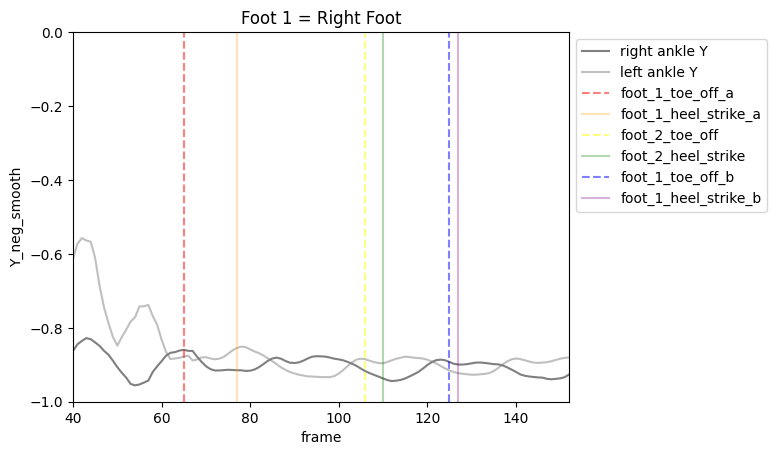

1


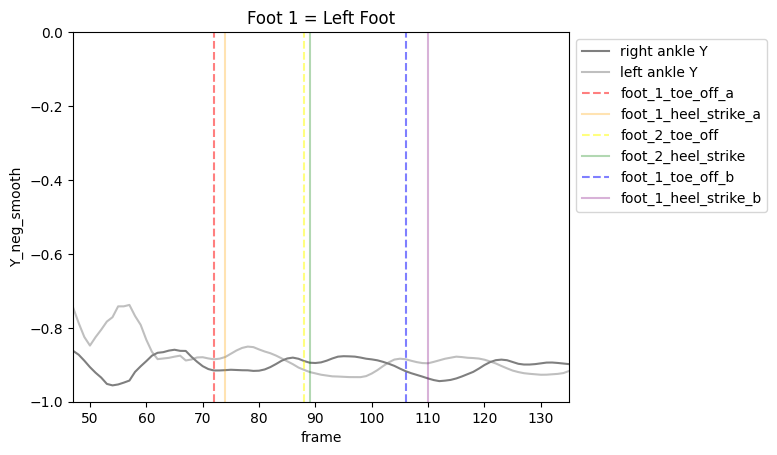

2


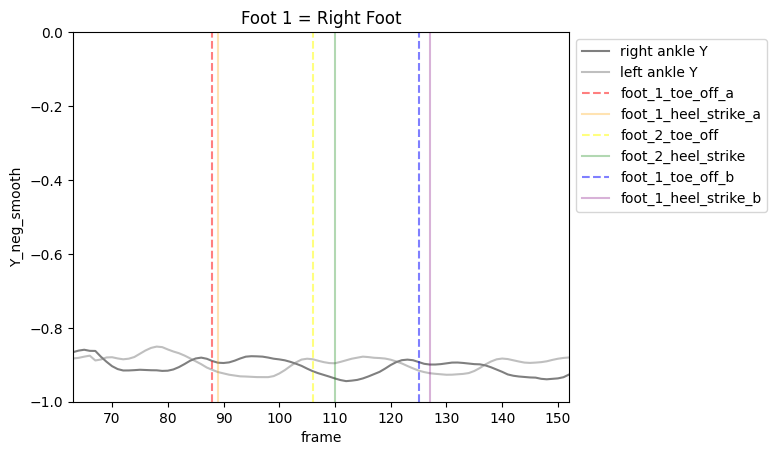

3


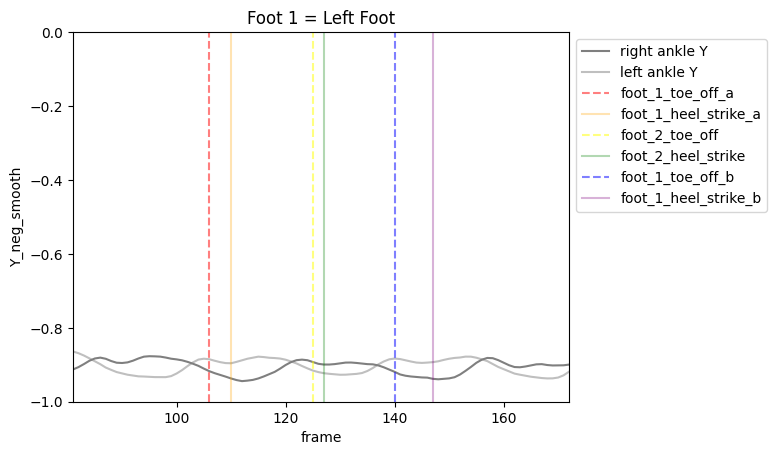

4


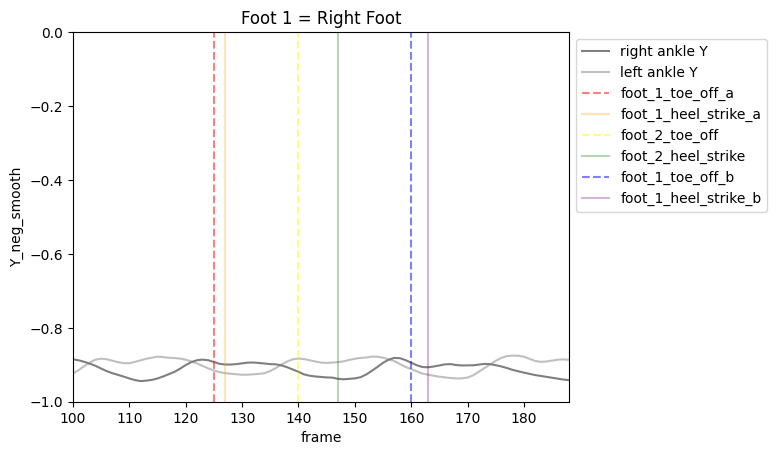

5


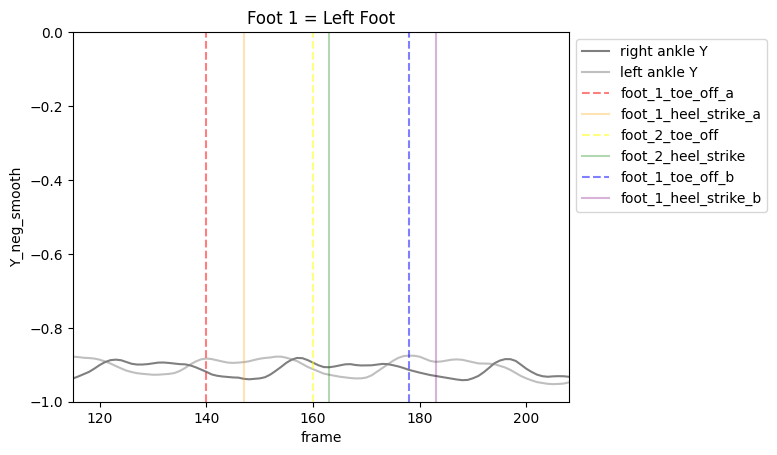

6


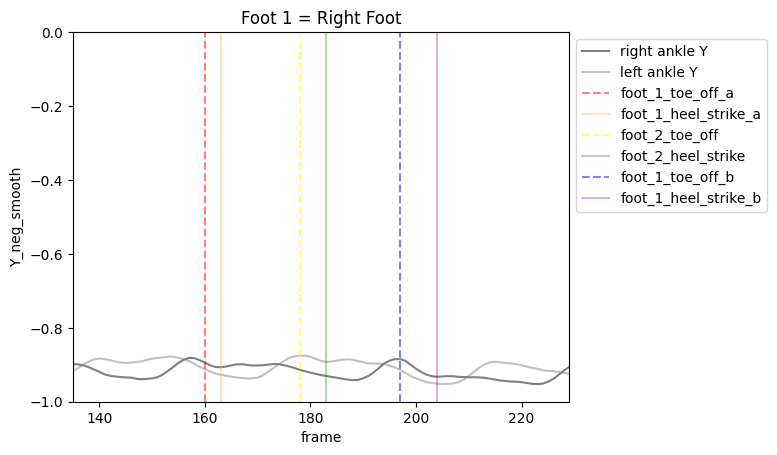

7


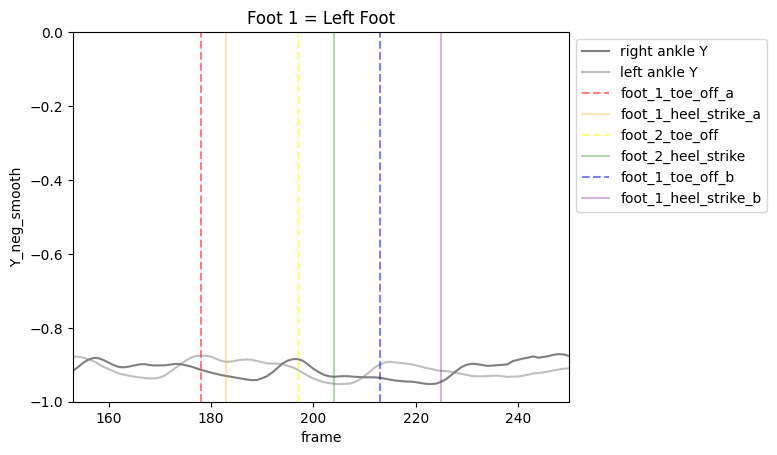

8


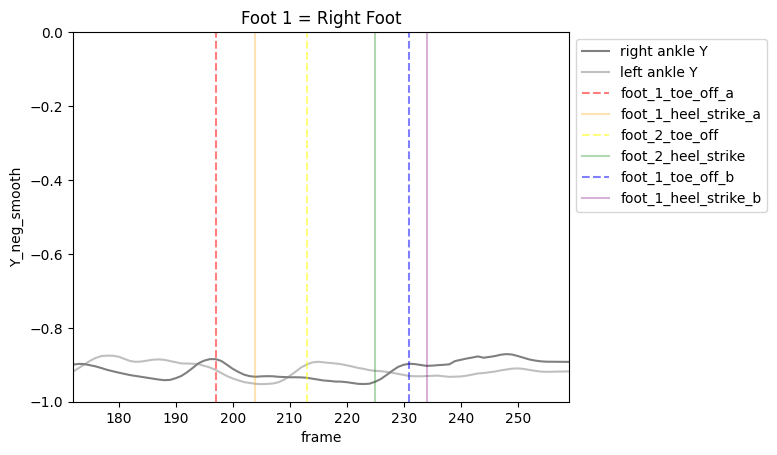

9


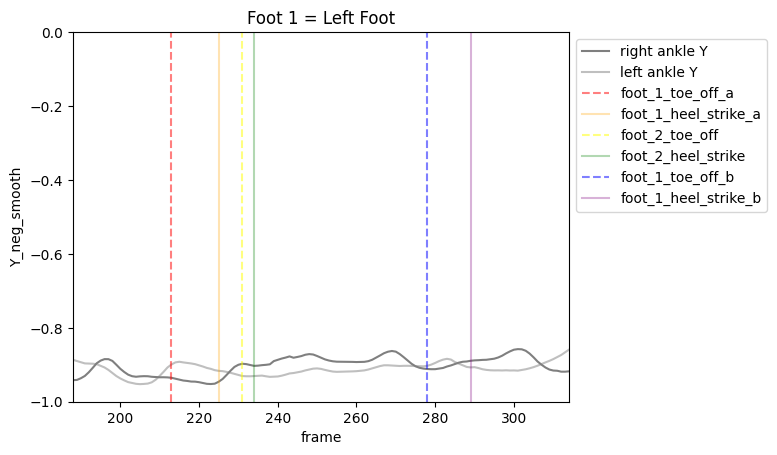

10


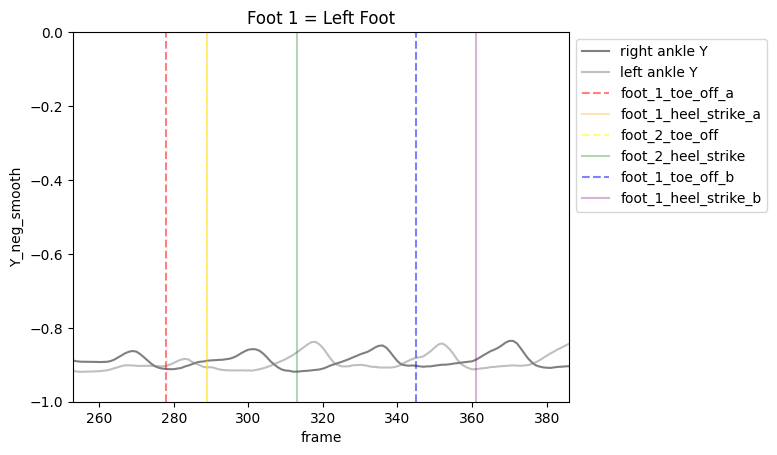

11


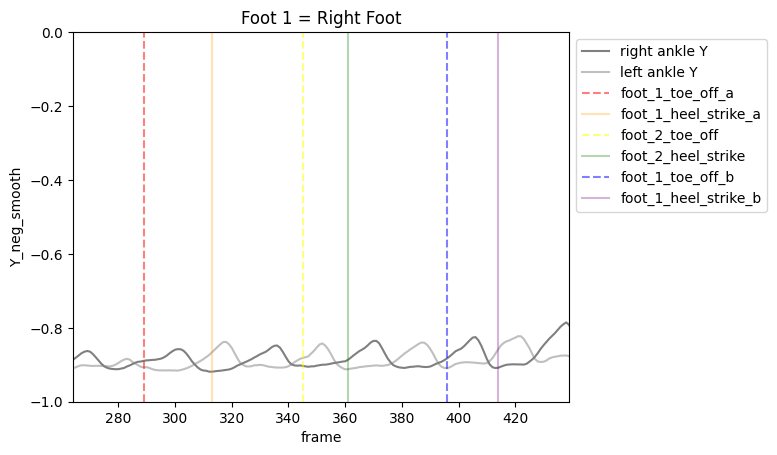

12


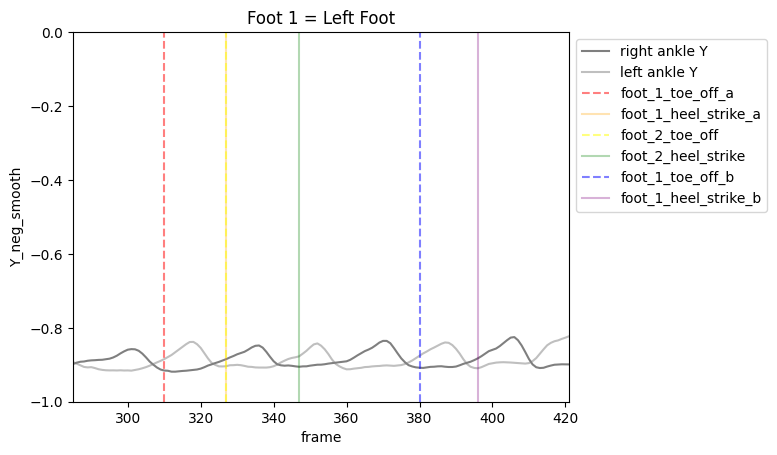

13


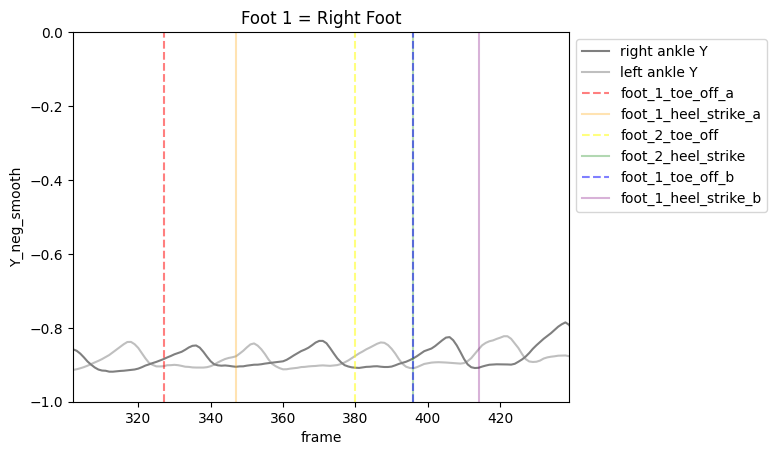

14


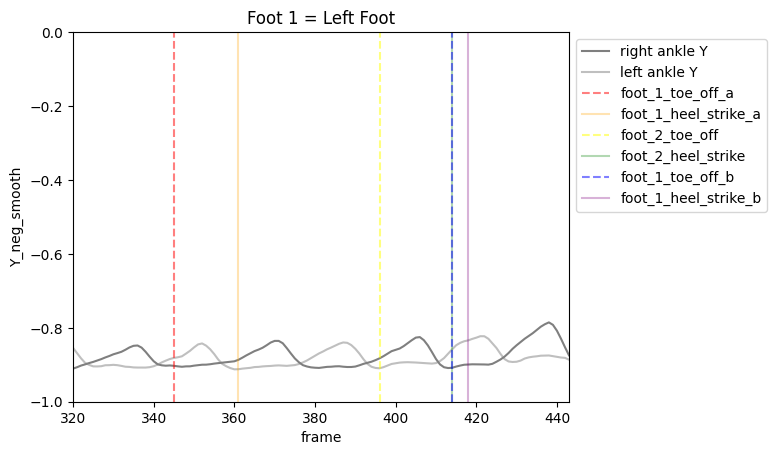

15


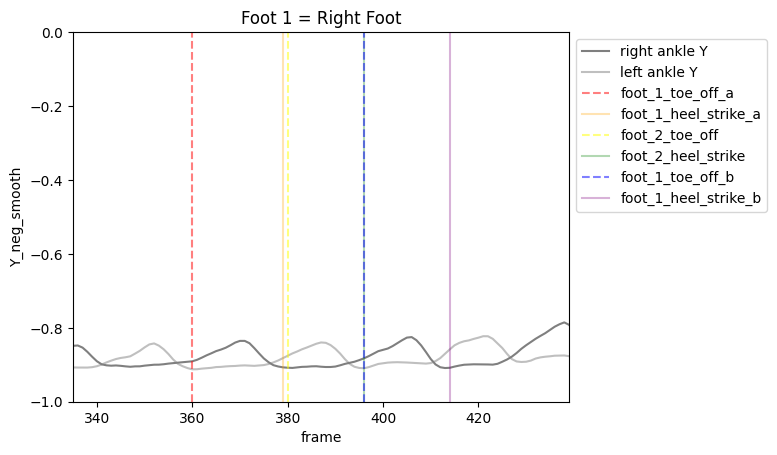

16


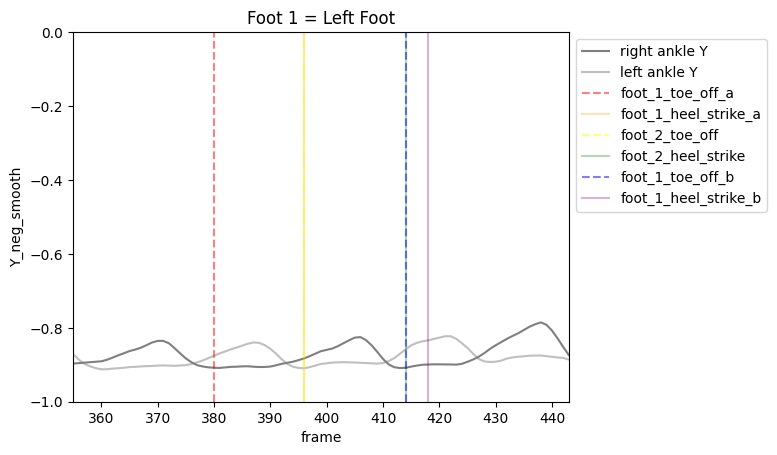

17


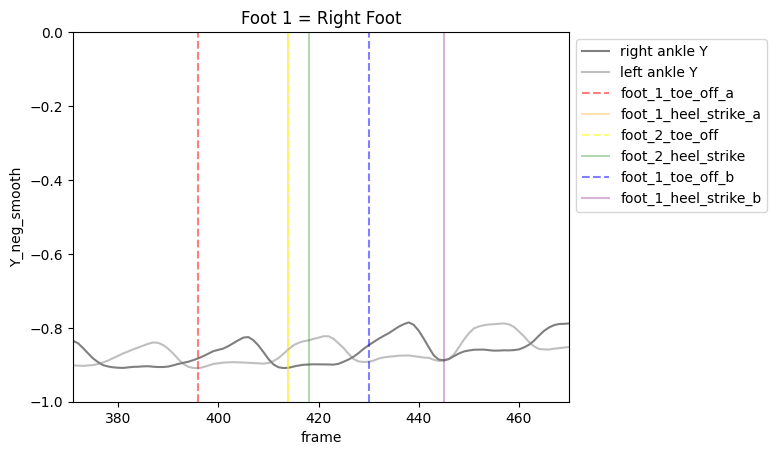

18


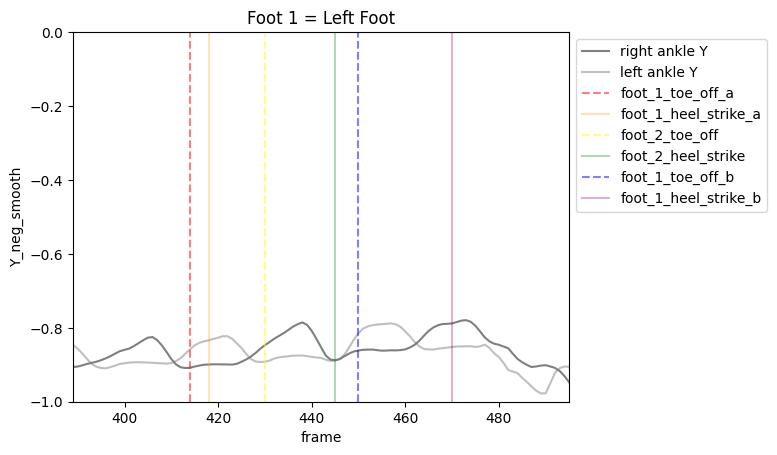

19


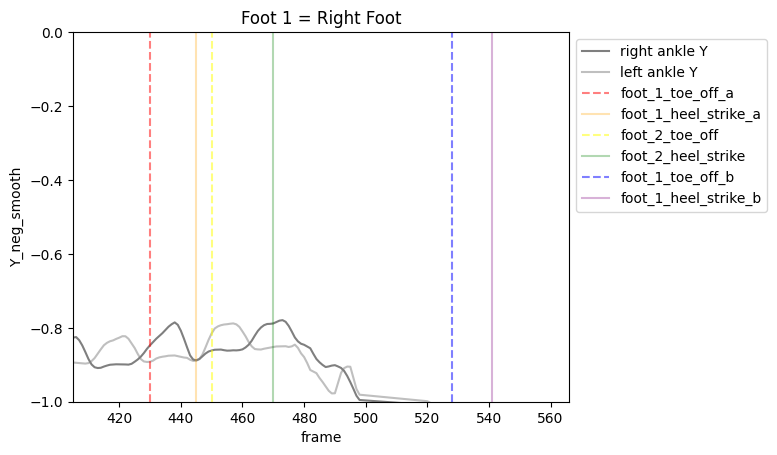

20


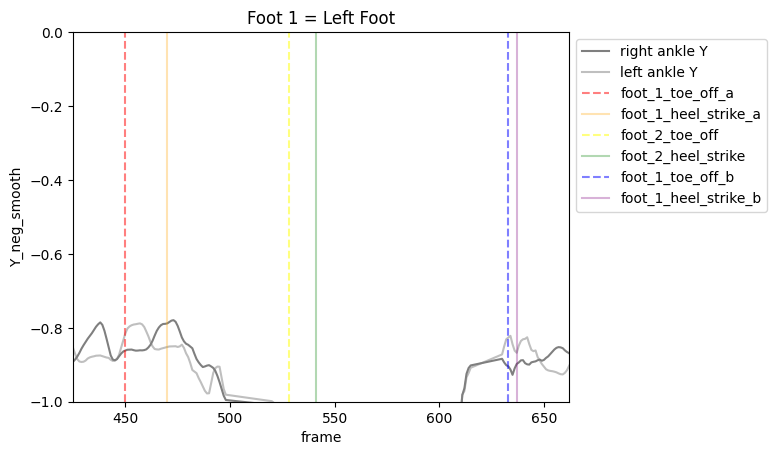

21


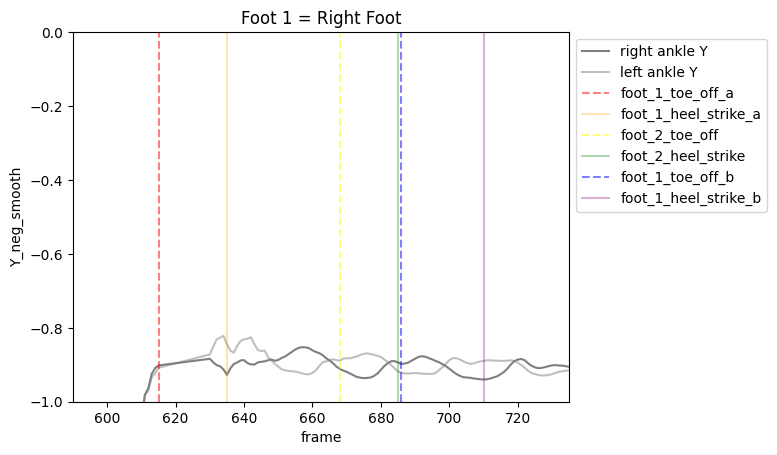

22


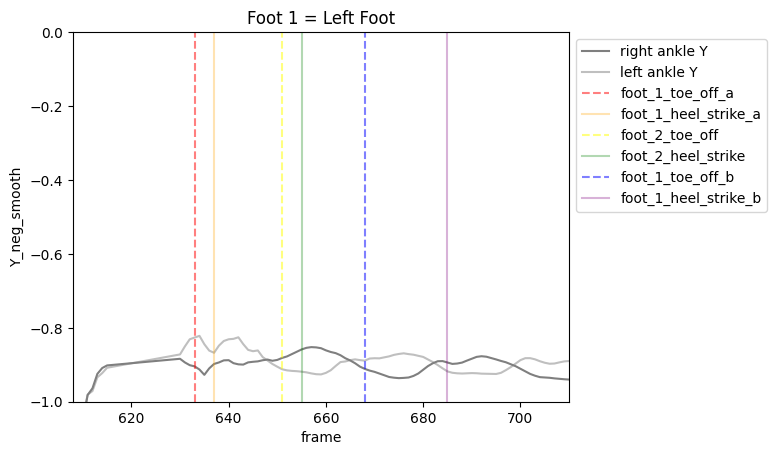

23


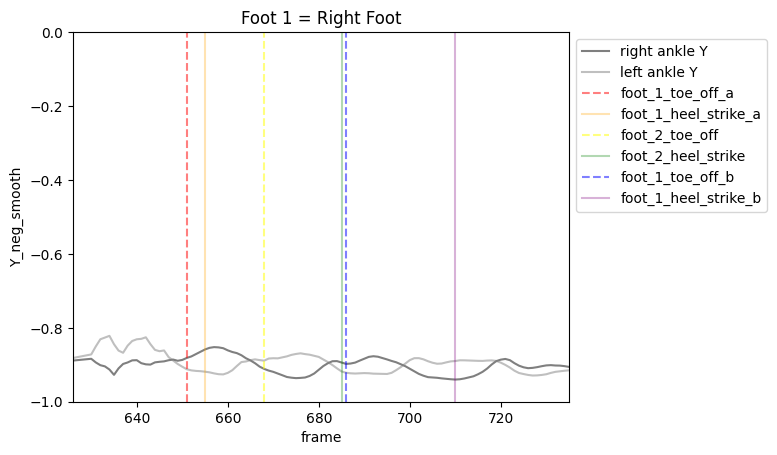

24


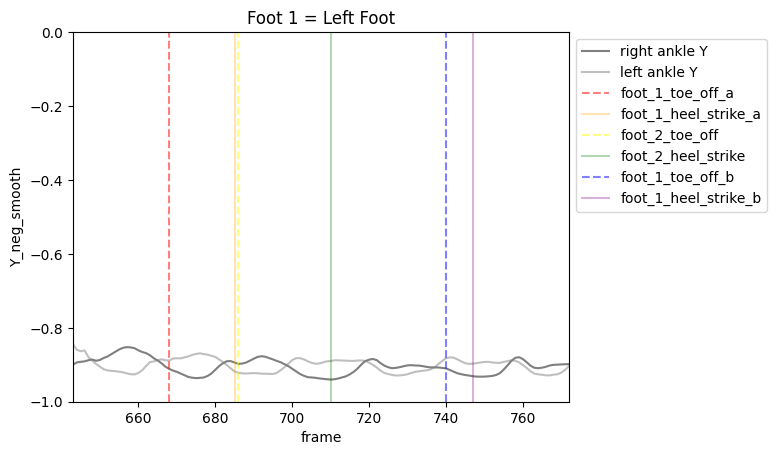

25


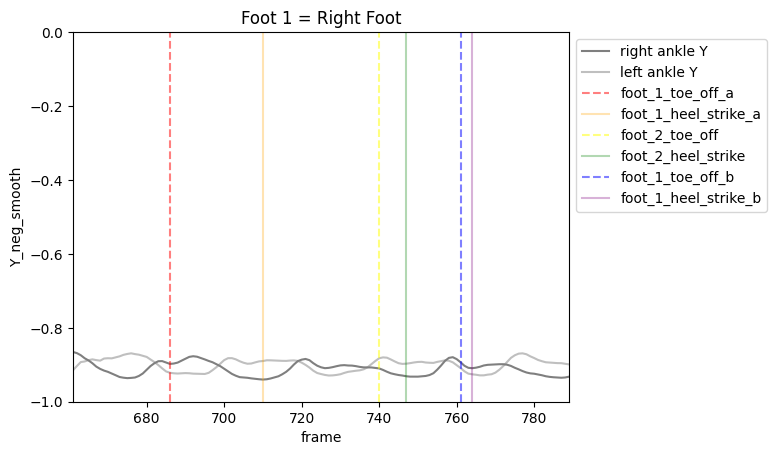

26


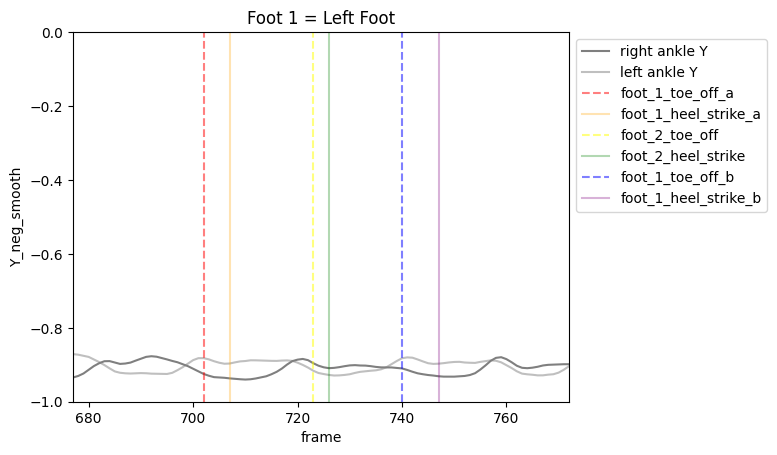

27


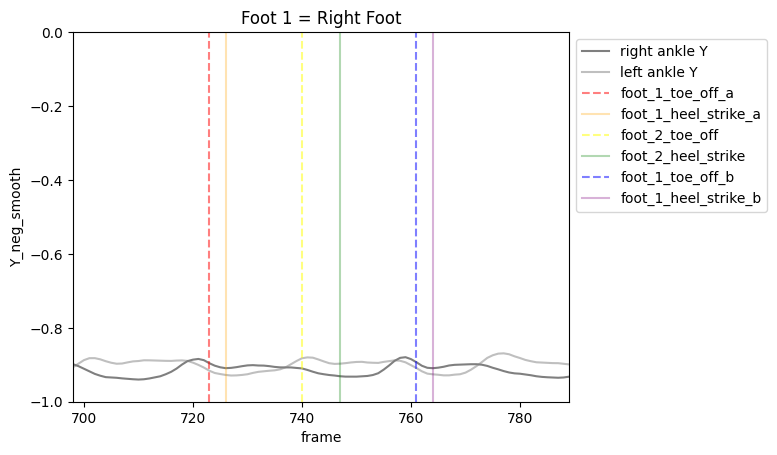

28


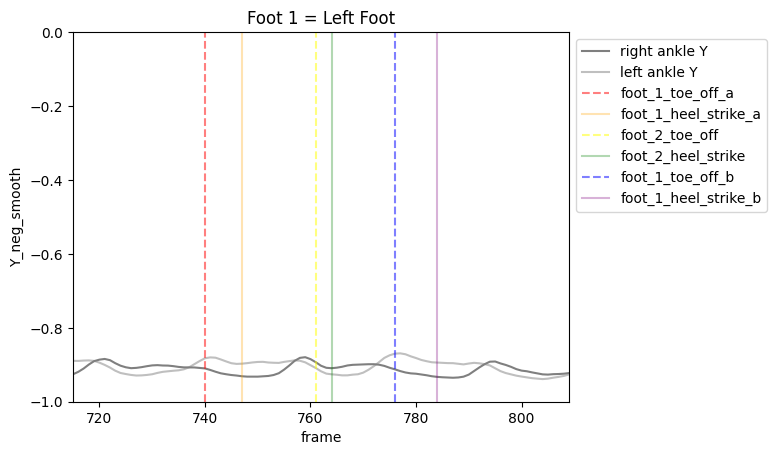

29


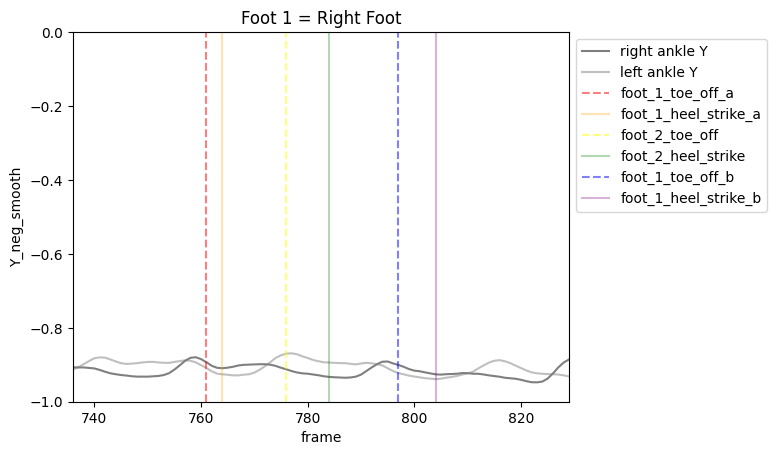

30


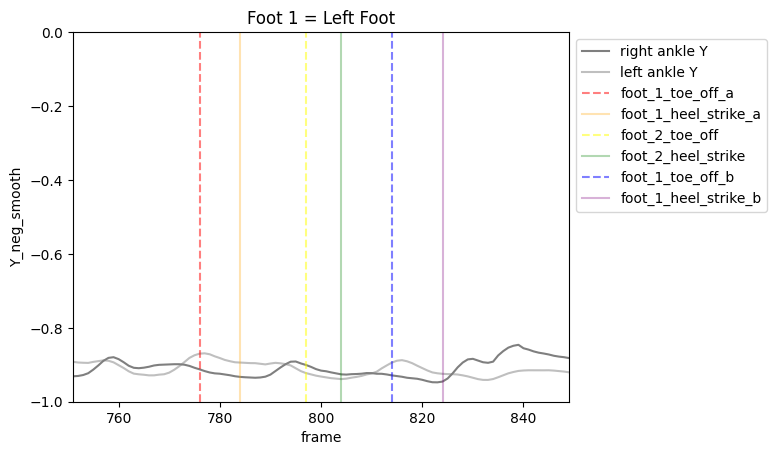

31


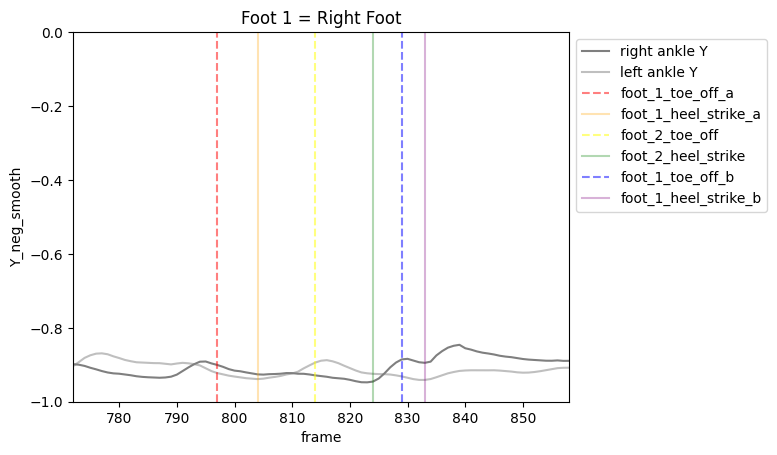

32


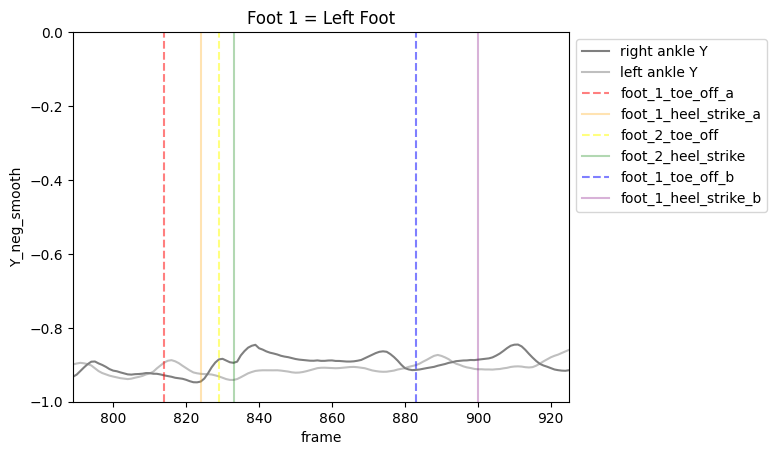

33


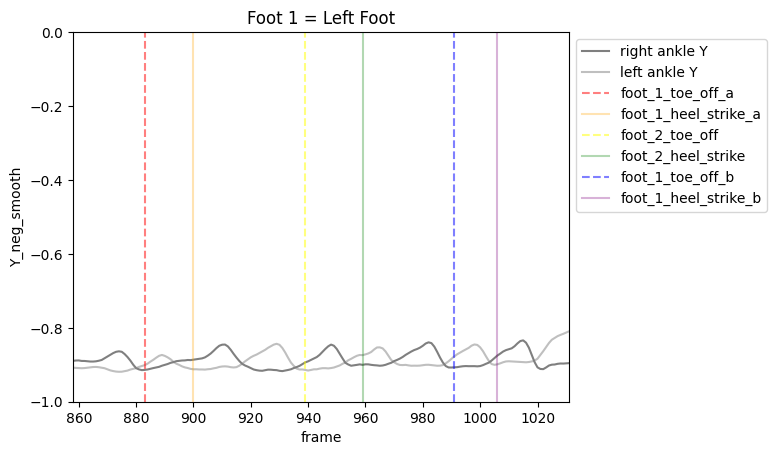

34


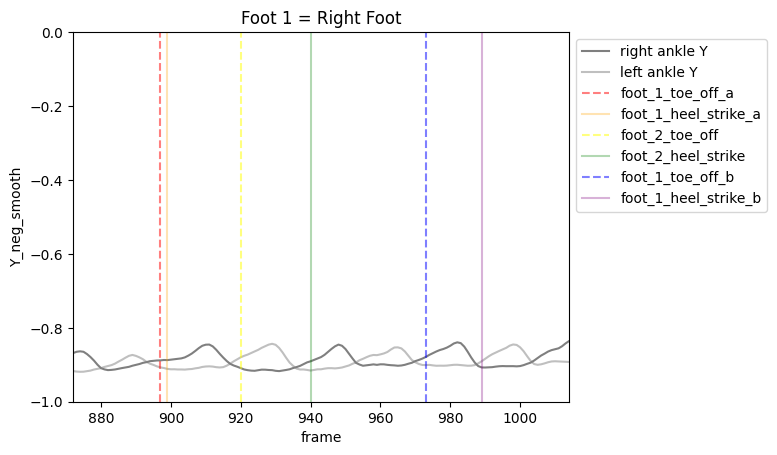

35


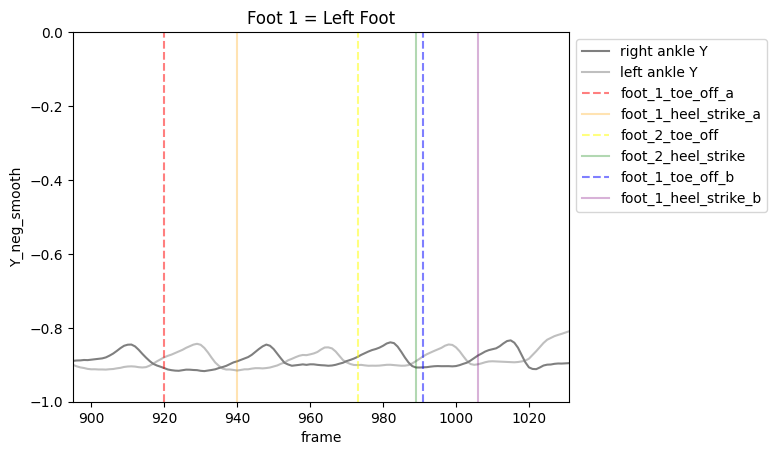

36


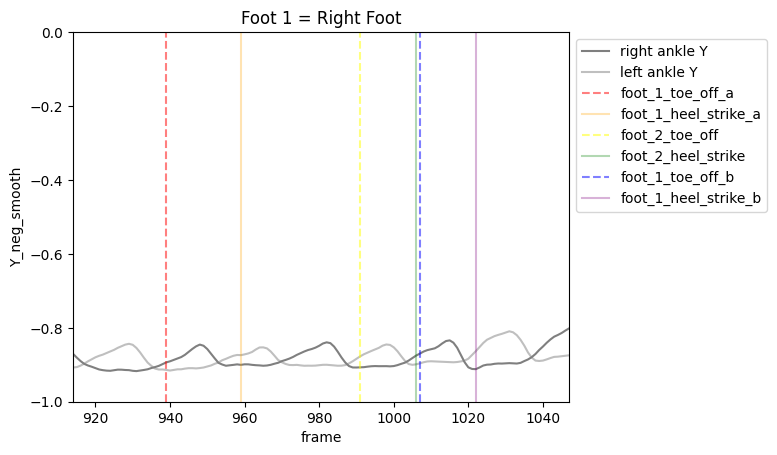

37


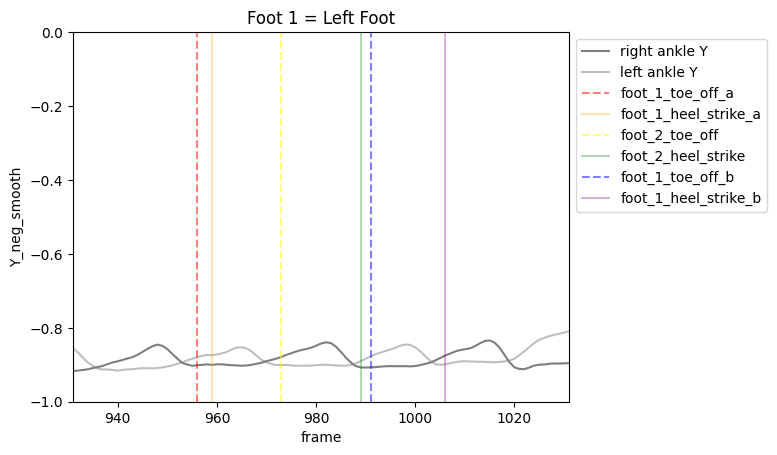

38


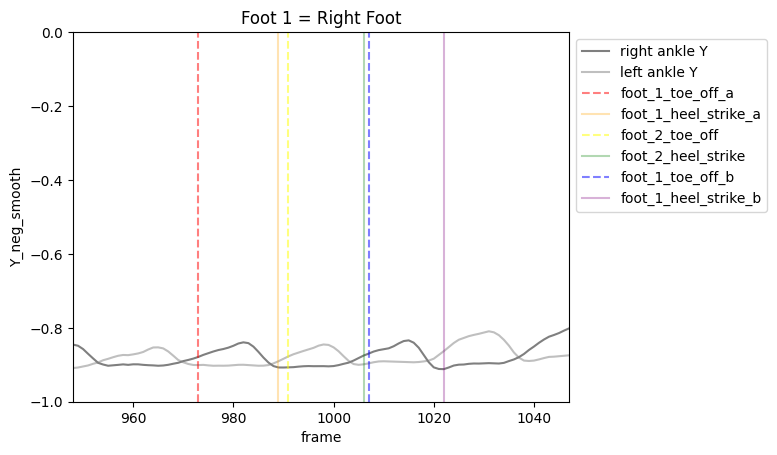

39


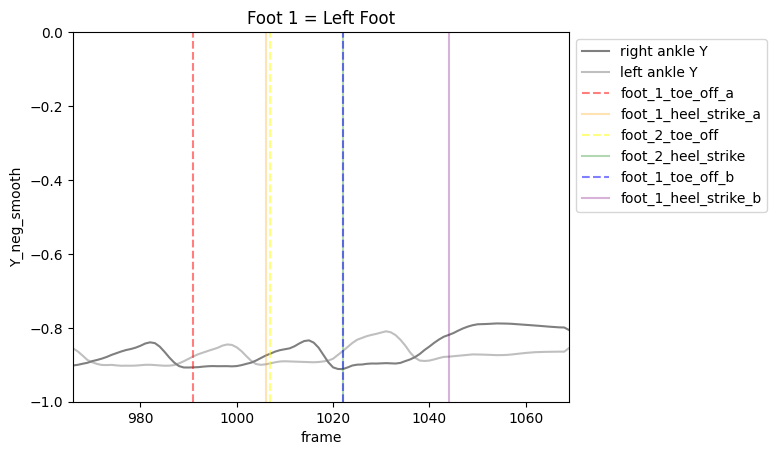

40


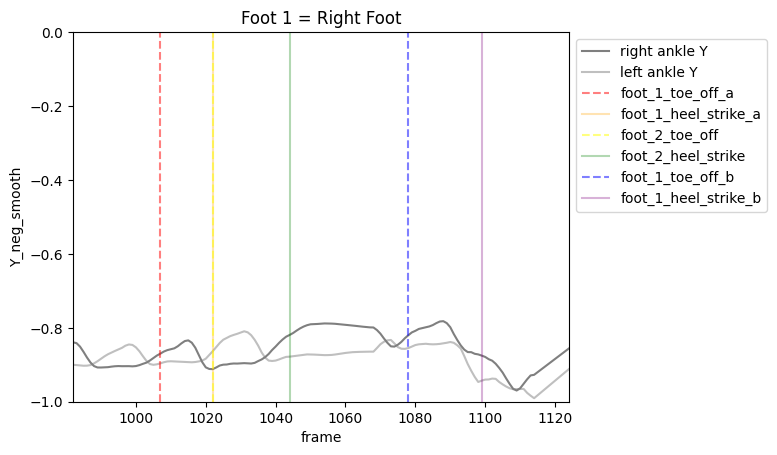

41


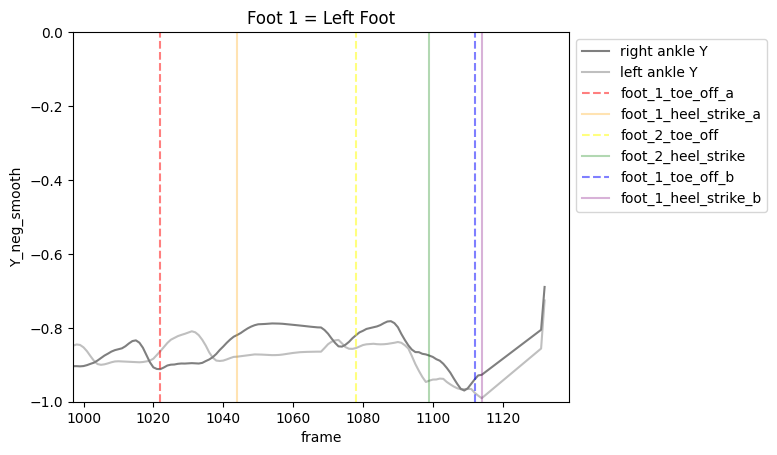

In [28]:
## Plot each set of gait events data 
for index, row in all_gait_events_df.iterrows():
    print(index)
    # right ankle y position 
    sns.lineplot(x = 'frame', y = 'Y_neg_smooth', 
                 data = mp_r_ank_df, 
                 color = 'black', label = 'right ankle Y', alpha = 0.5) 
    # left ankle y position 
    sns.lineplot(x = 'frame', y = 'Y_neg_smooth', 
                 data = mp_l_ank_df, 
                 color = 'grey', label = 'left ankle Y', alpha = 0.5) 
    
    # foot 1 toe off a
    plt.axvline(row['foot_1_toe_off_a'], color = 'red', linestyle = '--', alpha = 0.5, label = 'foot_1_toe_off_a')
    
    # foot 1 heel strike a 
    plt.axvline(row['foot_1_heel_strike_a'], color = 'orange', linestyle = '-', alpha = 0.3, label = 'foot_1_heel_strike_a')
    
    # foot 2 toe off 
    plt.axvline(row['foot_2_toe_off'], color = 'yellow', linestyle = '--', alpha = 0.5, label = 'foot_2_toe_off')

    # foot 2 heel strike 
    plt.axvline(row['foot_2_heel_strike'], color = 'green', linestyle = '-', alpha = 0.3, label = 'foot_2_heel_strike')

    # foot 1 toe off b 
    plt.axvline(row['foot_1_toe_off_b'], color = 'blue', linestyle = '--', alpha = 0.5, label = 'foot_1_toe_off_b')

    # foot 1 heel strike 2 
    plt.axvline(row['foot_1_heel_strike_b'], color = 'purple', linestyle = '-', alpha = 0.3, label = 'foot_1_heel_strike_b')

    # title = foot 1 
    if row['first_toe_off_foot'] == 'left':
        plt.title("Foot 1 = Left Foot") 
    elif row['first_toe_off_foot'] == 'right':
        plt.title("Foot 1 = Right Foot")

    plt.ylim([-1, 0])
    plt.xlim([row['foot_1_toe_off_a'] - 25, row['foot_1_heel_strike_b'] + 25]) 
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    plt.close() 

In [29]:
all_gait_events_df.head()

,y_cross_row_index,first_toe_off_foot,foot_1_toe_off_a,foot_1_heel_strike_a,foot_2_toe_off,foot_2_heel_strike,foot_1_toe_off_b,foot_1_heel_strike_b
0,1,right,65,77,106,110,125,127
1,2,left,72,74,88,89,106,110
2,3,right,88,89,106,110,125,127
3,4,left,106,110,125,127,140,147
4,5,right,125,127,140,147,160,163


In [30]:
# frame diff columns 
all_gait_events_df['frameDiff_to1a_hs1a'] = all_gait_events_df['foot_1_heel_strike_a'] - all_gait_events_df['foot_1_toe_off_a']
all_gait_events_df['frameDiff_hs1a_to2'] = all_gait_events_df['foot_2_toe_off'] - all_gait_events_df['foot_1_heel_strike_a']
all_gait_events_df['frameDiff_to2_hs2'] = all_gait_events_df['foot_2_heel_strike'] - all_gait_events_df['foot_2_toe_off']
all_gait_events_df['frameDiff_hs2_to1b'] = all_gait_events_df['foot_1_toe_off_b'] - all_gait_events_df['foot_2_heel_strike']
all_gait_events_df['frameDiff_to1b_hs1b'] = all_gait_events_df['foot_1_heel_strike_b'] - all_gait_events_df['foot_1_toe_off_b']


In [31]:
# gait cycle time = first contact of one foot the the following first contact of the same foot 
all_gait_events_df['gait_cycle_time_sec'] = (all_gait_events_df['foot_1_heel_strike_b'] - all_gait_events_df['foot_1_heel_strike_a']) / fps

In [32]:
# stance time = time foot 1 is in contact with the ground 
all_gait_events_df['stance_time_sec'] = (all_gait_events_df['foot_1_toe_off_b'] - all_gait_events_df['foot_1_heel_strike_a']) / 30 
all_gait_events_df['stance_time_per'] = (all_gait_events_df['stance_time_sec'] / all_gait_events_df['gait_cycle_time_sec']) * 100


In [33]:
# swing time - period of time foot 1 is not in contact with the ground 
all_gait_events_df['swing_time_sec'] = all_gait_events_df['gait_cycle_time_sec'] - all_gait_events_df['stance_time_sec']
all_gait_events_df['swing_time_per'] = (all_gait_events_df['swing_time_sec'] / all_gait_events_df['gait_cycle_time_sec']) * 100

In [34]:
# single support time 
# period of time when only the current foot is in contact with the ground 
all_gait_events_df['singlesupport_time_sec'] = (all_gait_events_df['foot_2_heel_strike'] - all_gait_events_df['foot_2_toe_off']) / fps
all_gait_events_df['singlesupport_per'] = (all_gait_events_df['singlesupport_time_sec'] / all_gait_events_df['gait_cycle_time_sec']) * 100


In [35]:
# double support time 
all_gait_events_df['ini_dsupport_sec'] = (all_gait_events_df['foot_2_toe_off'] - all_gait_events_df['foot_1_heel_strike_a']) / fps
all_gait_events_df['term_dsupport_sec'] = (all_gait_events_df['foot_1_toe_off_b'] - all_gait_events_df['foot_2_heel_strike']) / fps
all_gait_events_df['tot_dsupport_time_sec'] = all_gait_events_df['ini_dsupport_sec'] + all_gait_events_df['term_dsupport_sec'] 
all_gait_events_df['tot_dsupport_per'] = (all_gait_events_df['tot_dsupport_time_sec'] / all_gait_events_df['gait_cycle_time_sec']) * 100




In [36]:
all_gait_events_df

,y_cross_row_index,first_toe_off_foot,foot_1_toe_off_a,foot_1_heel_strike_a,foot_2_toe_off,foot_2_heel_strike,foot_1_toe_off_b,foot_1_heel_strike_b,frameDiff_to1a_hs1a,frameDiff_hs1a_to2,...,stance_time_sec,stance_time_per,swing_time_sec,swing_time_per,singlesupport_time_sec,singlesupport_per,ini_dsupport_sec,term_dsupport_sec,tot_dsupport_time_sec,tot_dsupport_per
0,1,right,65,77,106,110,125,127,12,29,...,1.600000,96.000000,0.066667,4.000000,0.133333,8.000000,0.966667,0.500000,1.466667,88.000000
1,2,left,72,74,88,89,106,110,2,14,...,1.066667,88.888889,0.133333,11.111111,0.033333,2.777778,0.466667,0.566667,1.033333,86.111111
2,3,right,88,89,106,110,125,127,1,17,...,1.200000,94.736842,0.066667,5.263158,0.133333,10.526316,0.566667,0.500000,1.066667,84.210526
3,4,left,106,110,125,127,140,147,4,15,...,1.000000,81.081081,0.233333,18.918919,0.066667,5.405405,0.500000,0.433333,0.933333,75.675676
4,5,right,125,127,140,147,160,163,2,13,...,1.100000,91.666667,0.100000,8.333333,0.233333,19.444444,0.433333,0.433333,0.866667,72.222222
5,6,left,140,147,160,163,178,183,7,13,...,1.033333,86.111111,0.166667,13.888889,0.100000,8.333333,0.433333,0.500000,0.933333,77.777778
6,7,right,160,163,178,183,197,204,3,15,...,1.133333,82.926829,0.233333,17.073171,0.166667,12.195122,0.500000,0.466667,0.966667,70.731707
7,8,left,178,183,197,204,213,225,5,14,...,1.000000,71.428571,0.400000,28.571429,0.233333,16.666667,0.466667,0.300000,0.766667,54.761905
8,9,right,197,204,213,225,231,234,7,9,...,0.900000,90.000000,0.100000,10.000000,0.400000,40.000000,0.300000,0.200000,0.500000,50.000000
9,10,left,213,225,231,234,278,289,12,6,...,1.766667,82.812500,0.366667,17.187500,0.100000,4.687500,0.200000,1.466667,1.666667,78.125000


In [37]:
# round and save 
temp_foot = all_gait_events_df['first_toe_off_foot'] 
all_gait_events_df = all_gait_events_df.apply(pd.to_numeric, errors='coerce')
all_gait_events_df = all_gait_events_df.round(2)
all_gait_events_df['first_toe_off_foot'] = temp_foot 

In [38]:
 all_gait_events_df.to_csv(os.path.join(output_path, 'all_gait_events_df.csv'))

OSError: Cannot save file into a non-existent directory: 'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\test_double_support_code\test_hip_heel_dist\BW-0204'

In [ ]:
plt.hist(all_gait_events_df['gait_cycle_time_sec'])

In [ ]:
plt.hist(all_gait_events_df['singlesupport_per'])


In [ ]:
plt.hist(all_gait_events_df['tot_dsupport_per'])

## Test filtering to improve accuracy 

In [ ]:
all_gait_events_df_2 = all_gait_events_df.loc[all_gait_events_df['gait_cycle_time_sec'] < 2]
len(all_gait_events_df_2)
all_gait_events_df_2['tot_dsupport_per'].mean()

In [ ]:
# filter ?? During reciprocal gait, the Single Support Time of the current foot is the same as the Swing Time of the previous opposite foot, 
# filter rows out where single support tmie is way diff then previoius swing time 

# During reciprocal gait, the Single Support Time of the current foot is 
# the same as the Swing Time of the previous opposite foot, 
# filter rows out where single support tmie is way diff then previoius swing time 

support_shift1 = all_gait_events_df['singlesupport_time_sec'].shift(-1) 
all_gait_events_df = all_gait_events_df.loc[all_gait_events_df['swing_time_sec'] == all_gait_events_df['singlesupport_time_sec'].shift(-1)] 
